# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Гурин Семен, вариант 3.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
### Задача Коши
Система n ОДУ первого порядка:
$
\begin{cases}
    y'_1=f_1(x,y_1,...,y_n) \\
    \dots \\
    y'_n=f_n(x,y_1,...,y_n) \\
    y_1(x_0)=y_{01} \\
    \dots \\
    y_n(x_0)=y_{0n} \\
\end{cases}
$

ОДУ n-го порядка:
$
\begin{cases}
    y^{(n)}=f(x,y,...,y^{(n-1)}) \\
    y(x_0)=y_{01} \\
    \dots \\
    y^{(n-1)}(x_0)=y_{0n} \\
\end{cases}
$

Решение задачи Коши состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющим начальным условиям.

### Краевая задача 
Задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.


## Постановка задачи

Дано дифференциальное уравнение:

$\quad\quad\quad\quad\quad y''=f(x,y), a < x < b$ $\quad\quad\quad\quad\quad(1)$

и граничные условия

$\quad\quad\quad\quad\quad y(a) = y_a,$ $ y(b) = y_b$    $\quad\space\space\quad\quad\quad\quad\quad(2)$

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями 

$\quad\quad\quad\quad\quad y(a) = y_a, y'(a) = h$     $\quad\space\space\quad\quad\quad\quad\quad(3)$

План решения основан на многократном решении задачи Коши (1),(3).

Задача сводится к нахождению такого значения переменной h, при которой выполнено условие на правом конце отрезка, т.е. должно выполняться

$\quad\quad\quad\quad\quad y(b,h) = y_b$

Это уравнение с одним неизвестным h.

Для его решения можно применить стандартный метод половинного деления.

## Выполнение работы

Имеем дифференциальное уравнение:

$y'' = cosx+y^2$

Краевые значения:

$y(0) = 4$

$y(2) = -2$

Приведем к задаче Коши:

$\begin{cases}
    y''=f(x,y)\\
    y(0)=4\\
    y'(0)=h\\
\end{cases}
$

$
\begin{cases}
y'=g\\
g'=cosx+y^2\\
\end{cases}
$

In [89]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate

In [90]:
def f(Y,t):
    return [Y[1], (np.cos(t)+np.power(Y[0],2))]

In [91]:
y_a = 4
y_b = -2
h0 = -10
step = 0.001

rand h_0 = -10  f(b,h_0): -1.296087875906137


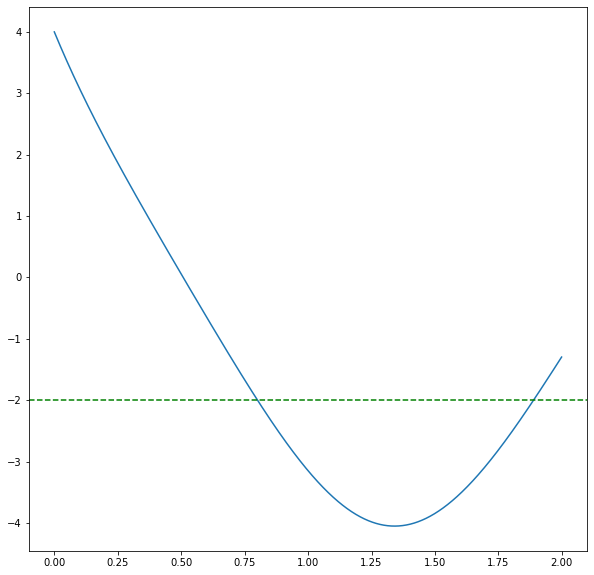

In [92]:
res = integrate.odeint(f, [y_a, h0], np.arange(0, 2, step))
res_up = res
print("rand h_0 =",h0 , " f(b,h_0):",res[-1, 0])

plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 2, 0.001), res[:, 0])
plt.axhline(y=y_b,color='green', linestyle='--')
plt.show()

h:[ -9.290000000000393 , -9.290693359375016 ] f(b,h):[ -2.0004770110975283 , -1.296087875906137 ]


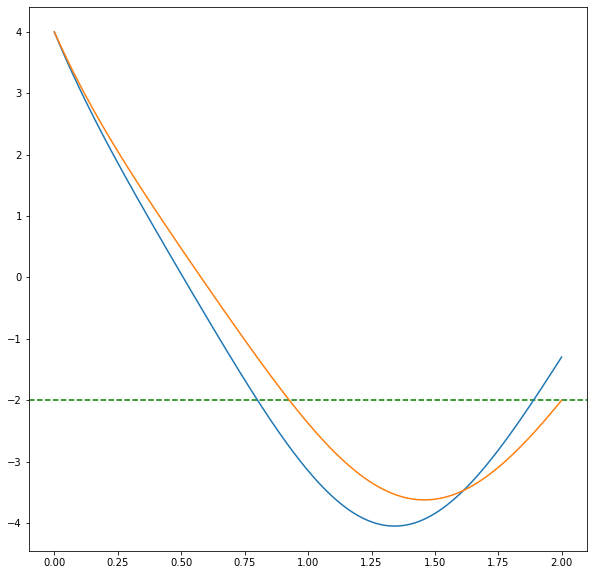

In [93]:
up_h = h0
up_y = res[-1,0]
last_y = res[-1,0]

while last_y > y_b:
    h0 = h0 + 0.001
    res = integrate.odeint(f, [y_a,h0], np.arange(0, 2, 0.001))
    last_y = res[-1,0]
res_low = res
low_h = h0
low_y = res[-1,0]

print("h:[",low_h,",",upper_h,"]", "f(b,h):[",low_y,",", up_y,"]")
plt.figure(figsize=(10,10))
plt.axhline(y=y_b, color='green', linestyle='--')
plt.plot(np.arange(0, 2, 0.001), res_up[:,0])
plt.plot(np.arange(0, 2, 0.001), res_low[:,0])

h:[ -9.290000000000393 , -9.290693359375393 ]  f(b,h):[ -2.0004770110975283 , -1.9998493345610455 ]
resulted h_0 = -9.290693359375393


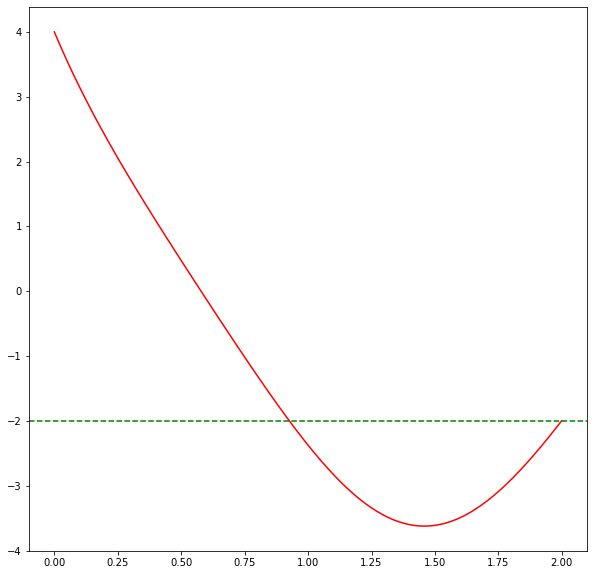

In [94]:
mid = 0

while abs(up_y - low_y) >= 0.001:
    dh = (up_h - low_h)/2
    h_mid = low_h + dh
    mid = integrate.odeint(f, [y_a,h_mid], np.arange(0, 2, 0.001))
    if(mid[-1,0] > y_b):
        up_h = h_mid
        up_y = mid[-1,0]
    else:
        low_h = h_mid
        low_y = mid[-1,0]

print("h:[",low_h,",",up_h,"] ", "f(b,h):[",low_y,",",up_y,"]")
print("resulted h_0 =",h_mid)
plt.figure(figsize=(10,10))
plt.axhline(y=y_b, color='green', linestyle='--')
plt.plot(np.arange(0, 2, 0.001), mid[:,0], color='red')

## Вывод

В результате выполнения практической работы, решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши. Так же был изучен и применем метод половиного деления.